In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import statistics
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures

In [29]:
Xtrain = np.arange(0,1,0.01).reshape(-1, 1)
ytrain = 10*Xtrain + np.random.normal(0.0,1.0,100).reshape(-1, 1)
model = LinearRegression().fit(Xtrain.reshape(-1, 1), ytrain.reshape(-1, 1))
print(model.intercept_, model.coef_)


[-0.17610013] [[10.42341414]]


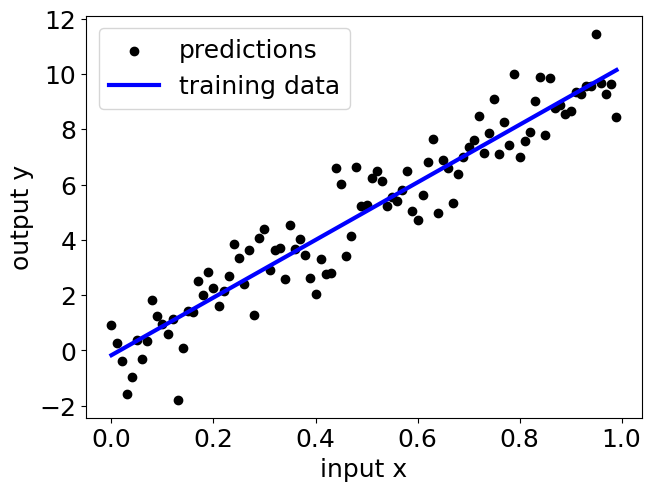

In [30]:
ypred = model.predict(Xtrain)
plt.rc('font', size=18)
plt.rcParams['figure.constrained_layout.use'] = True
plt.scatter(Xtrain, ytrain, color='black')
plt.plot(Xtrain, ypred, color='blue', linewidth=3)
plt.xlabel('input x'); plt.ylabel('output y')
plt.legend(['predictions','training data'])
plt.show()

In [31]:
Xtrain = np.random.uniform(0,1,100)
ytrain = np.sign(Xtrain-0.5)
Xtrain = Xtrain.reshape(-1, 1)
model = LogisticRegression(penalty='none',solver='lbfgs')
model.fit(Xtrain, ytrain)
print("intercept %f, slope %f"%(model.intercept_, model.coef_))

intercept -811.267436, slope 1626.264950


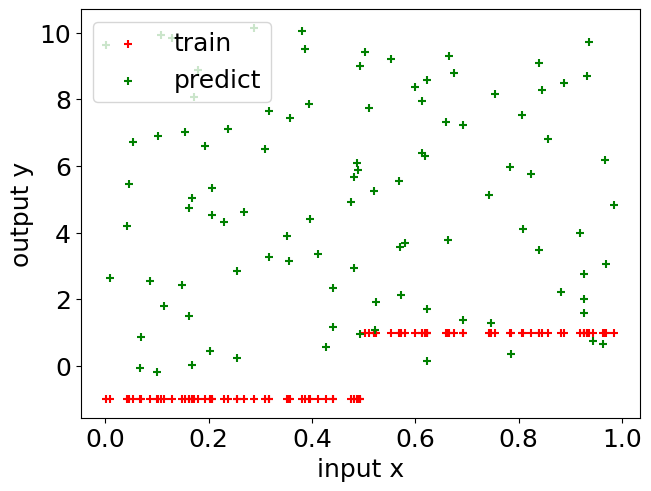

In [32]:
plt.rc('font', size=18)
plt.rcParams['figure.constrained_layout.use'] = True
plt.scatter(Xtrain, ytrain, color='red', marker='+')
plt.scatter(Xtrain, ypred, color='green', marker='+')
plt.xlabel("input x"); plt.ylabel("output y")
plt.legend(["train","predict"])
plt.show()

In [33]:
model = LinearSVC(C=1.0).fit(Xtrain, ytrain)
print("intercept %f, slope %f"%(model.intercept_, model.coef_))

intercept -1.829563, slope 3.690265


In [34]:
from sklearn.metrics import mean_squared_error  # Import mean_squared_error
X = np.arange(0,1,0.05).reshape(-1, 1)
y = 10*X + np.random.normal(0.0,1.0,X.size).reshape(-1, 1)
for i in range(5):
    Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2)
    model = LinearRegression().fit(Xtrain, ytrain)
    ypred = model.predict(Xtest)
    print("intercept %f, slope %f, square error %f"%(model.intercept_, model.coef_, mean_squared_error(ytest,ypred)))

intercept 0.660593, slope 8.247538, square error 0.262787
intercept 0.380478, slope 8.822730, square error 0.791247
intercept 0.593819, slope 8.763730, square error 0.754393
intercept 0.930616, slope 8.177547, square error 0.887864
intercept 0.647486, slope 8.568578, square error 0.660561


In [35]:
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print(scores)
print("Accuracy: %0.2f (+/− %0.2f)" % (scores.mean(), scores.std()))
kf = KFold(n_splits=5)
for train, test in kf.split(X):
    model = LinearRegression().fit(X[train], y[train])
    ypred = model.predict(X[test]) 
    print("intercept %f, slope %f, square error %f"%(model.intercept_, model.coef_,mean_squared_error(y[test],ypred)))

[-0.59154072 -1.05142584 -1.3138085  -0.3116283  -0.13170593]
Accuracy: -0.68 (+/− 0.44)
intercept 0.919849, slope 8.090525, square error 0.591541
intercept 0.451023, slope 8.690872, square error 1.051426
intercept 0.598369, slope 8.622656, square error 1.313808
intercept 0.608275, slope 8.423571, square error 0.311628
intercept 0.542381, slope 8.769716, square error 0.131706


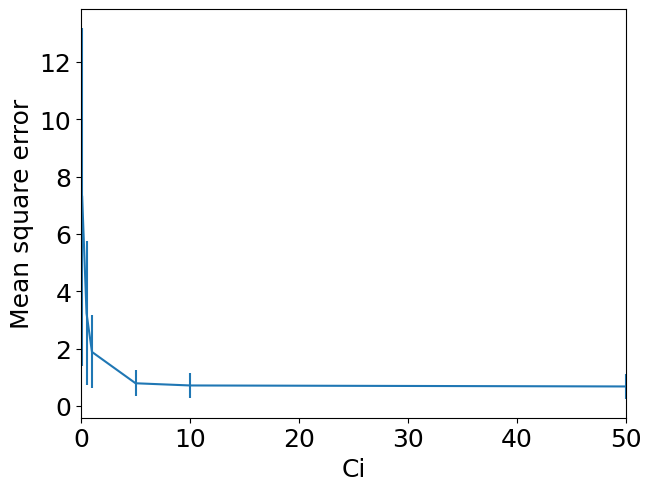

In [36]:
mean_error=[]; std_error=[]
Ci_range = [0.1, 0.5, 1, 5, 10, 50, 100]
for Ci in Ci_range:
    from sklearn.linear_model import Ridge
    model = Ridge(alpha=1/(2*Ci))
    temp=[]
    kf = KFold(n_splits=5)
    for train, test in kf.split(X):
        model.fit(X[train], y[train])
        ypred = model.predict(X[test])
        temp.append(mean_squared_error(y[test],ypred))
    mean_error.append(np.array(temp).mean())
    std_error.append(np.array(temp).std())
plt.errorbar(Ci_range,mean_error,yerr=std_error)
plt.xlabel('Ci'); plt.ylabel('Mean square error')
plt.xlim((0,50))
plt.show()

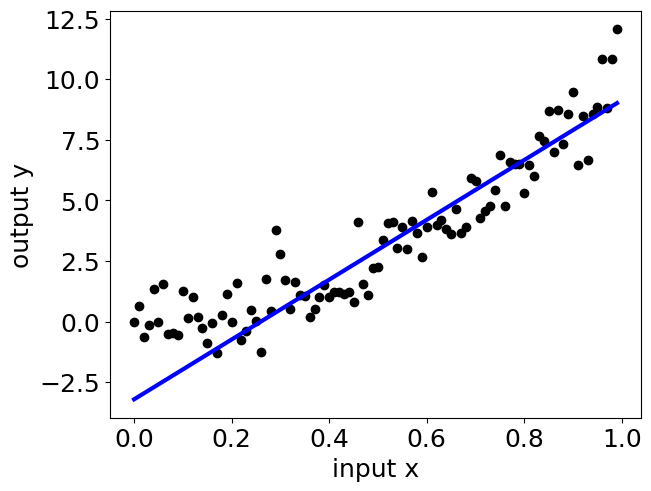

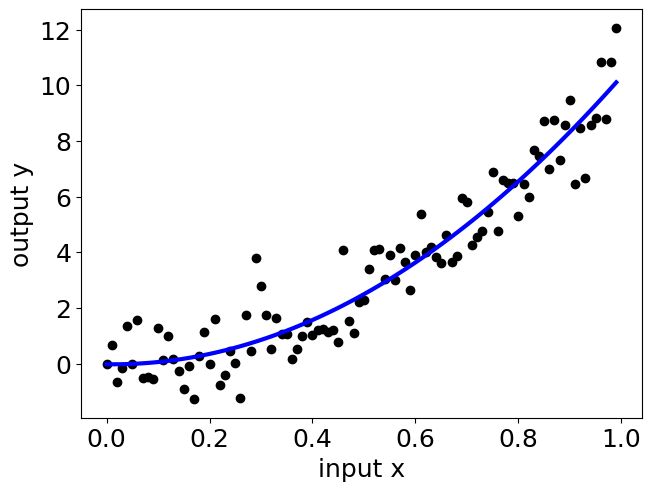

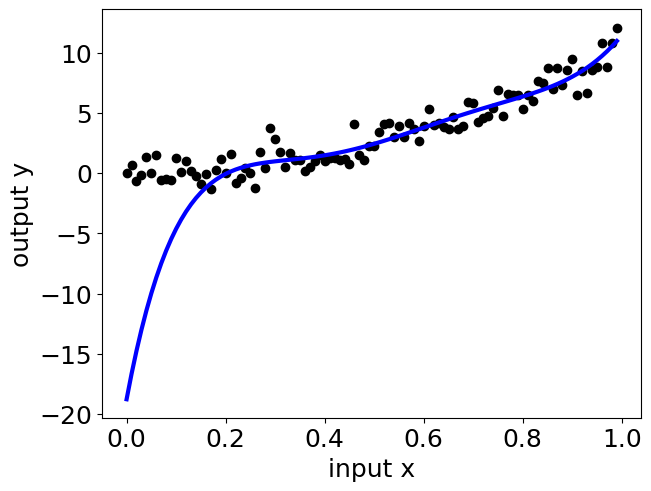

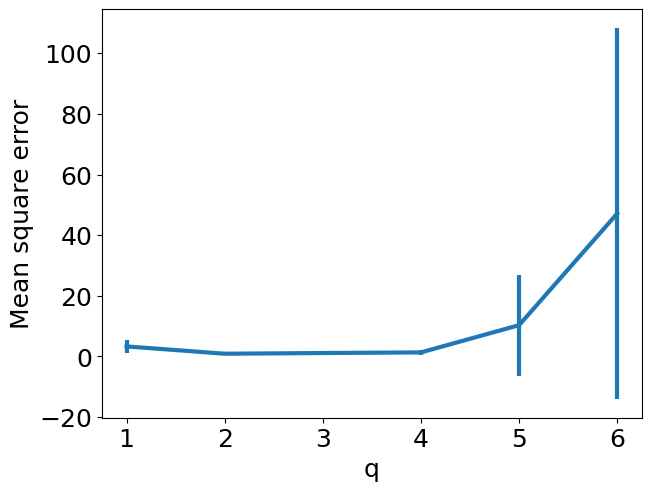

In [37]:
X = np.arange(0,1,0.01).reshape(-1, 1)
y = 10*(X**2) + np.random.normal(0.0,1.0,X.size).reshape(-1, 1)
kf = KFold(n_splits=5)
plt.rc('font', size=18); plt.rcParams['figure.constrained_layout.use'] = True
mean_error=[]; std_error=[]
q_range = [1,2,3,4,5,6]
for q in q_range:
    Xpoly = PolynomialFeatures(q).fit_transform(X)
    model = LinearRegression()
    temp=[]; plotted = False
    for train, test in kf.split(Xpoly):
        model.fit(Xpoly[train], y[train])
        ypred = model.predict(Xpoly[test])
        temp.append(mean_squared_error(y[test],ypred))
        if ((q==1) or (q==2) or (q==6)) and not plotted:
            plt.scatter(X, y, color='black')
            ypred = model.predict(Xpoly)
            plt.plot(X, ypred, color='blue', linewidth=3)
            plt.xlabel("input x"); plt.ylabel("output y")
            plt.show()
            plotted = True
    mean_error.append(np.array(temp).mean())
    std_error.append(np.array(temp).std())
plt.errorbar(q_range,mean_error,yerr=std_error,linewidth=3)
plt.xlabel('q')
plt.ylabel('Mean square error')
plt.show()

square error 0.942502 0.515790


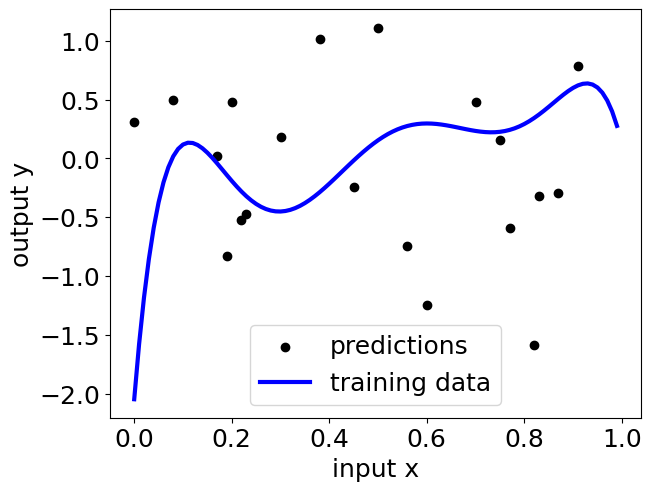

In [38]:
X = np.arange(0,1,0.01).reshape(-1, 1)
y = np.random.normal(0.0,1.0,X.size).reshape(-1, 1)

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2)

Xtrain_poly = PolynomialFeatures(6).fit_transform(Xtrain)
Xtest_poly = PolynomialFeatures(6).fit_transform(Xtest)
X_poly = PolynomialFeatures(6).fit_transform(X)

model = LinearRegression().fit(Xtrain_poly, ytrain)

ypred = model.predict(Xtest_poly)

from sklearn.dummy import DummyRegressor
dummy = DummyRegressor(strategy="mean").fit(Xtrain_poly, ytrain)
ydummy = dummy.predict(Xtest_poly)

print("square error %f %f"%(mean_squared_error(ytest,ypred),mean_squared_error(ytest,ydummy)))

plt.rc('font', size=18); plt.rcParams['figure.constrained_layout.use'] = True
plt.scatter(Xtest, ytest, color='black')
ypred = model.predict(X_poly)
plt.plot(X, ypred, color='blue', linewidth=3)
plt.xlabel("input x"); plt.ylabel("output y")
plt.legend(["predictions","training data"])
plt.show()

Confusion Matrix for LinearSVC:
[[5 5]
 [3 7]]
Classification Report for LinearSVC:
              precision    recall  f1-score   support

           0       0.62      0.50      0.56        10
           1       0.58      0.70      0.64        10

    accuracy                           0.60        20
   macro avg       0.60      0.60      0.60        20
weighted avg       0.60      0.60      0.60        20

Confusion Matrix for DummyClassifier:
[[ 0 10]
 [ 0 10]]
Classification Report for DummyClassifier:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        10
           1       0.50      1.00      0.67        10

    accuracy                           0.50        20
   macro avg       0.75      0.50      0.33        20
weighted avg       0.75      0.50      0.33        20



c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, in

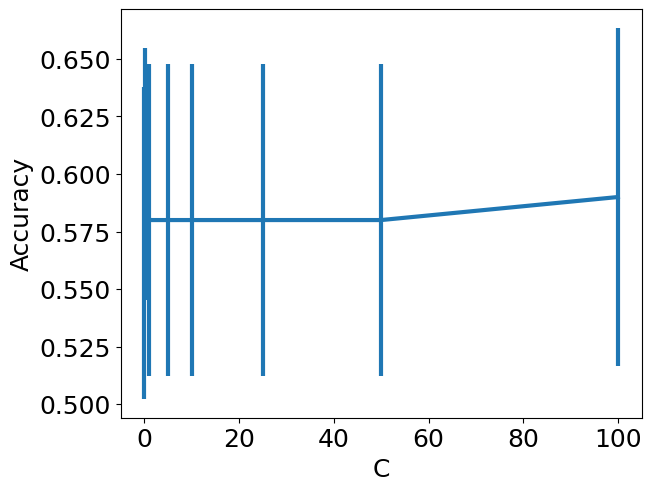

In [40]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

# Generate some sample data for X and y
X = np.random.rand(100, 2)
y = np.random.choice([0, 1], size=100)

# Split the data into train and test sets
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

# Fit LinearSVC model
model = LinearSVC(C=1.0).fit(Xtrain, ytrain)
preds = model.predict(Xtest)

# Print confusion matrix and classification report for LinearSVC
print("Confusion Matrix for LinearSVC:")
print(confusion_matrix(ytest, preds))

print("Classification Report for LinearSVC:")
print(classification_report(ytest, preds, zero_division=1))  # Set zero_division to 1

# Fit DummyClassifier
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy="most_frequent").fit(Xtrain, ytrain)
ydummy = dummy.predict(Xtest)

# Print confusion matrix and classification report for DummyClassifier
print("Confusion Matrix for DummyClassifier:")
print(confusion_matrix(ytest, ydummy))

print("Classification Report for DummyClassifier:")
print(classification_report(ytest, ydummy, zero_division=1))  # Set zero_division to 1

mean_error = []
std_error = []
C_range = [0.01, 0.1, 1, 5, 10, 25, 50, 100]

for C in C_range:
    model = LinearSVC(C=C)
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')  # Use 'accuracy' for scoring
    mean_error.append(np.array(scores).mean())
    std_error.append(np.array(scores).std())

plt.rc('font', size=18)
plt.rcParams['figure.constrained_layout.use'] = True
plt.errorbar(C_range, mean_error, yerr=std_error, linewidth=3)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.show()



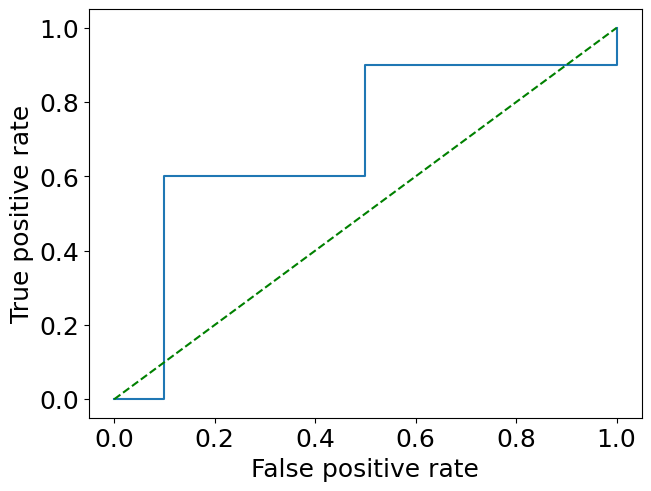

In [41]:
plt.rc('font', size=18); plt.rcParams['figure.constrained_layout.use'] = True
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)
model = LinearSVC(C=1.0).fit(Xtrain, ytrain)
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(ytest,model.decision_function(Xtest))
plt.plot(fpr,tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.plot([0, 1], [0, 1], color='green',linestyle='--')
plt.show()